# FACE EXPRESSION PREDICTION USING SUPPORT VECTOR MACHINE
## Minh Quang Ngo 597115

The dataset is available on the [CK+ Kaggle Dataset](https://www.kaggle.com/datasets/shawon10/ckplus) 

### Importing all of the necessary packages

In [2]:
import random 
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

from sklearn.model_selection import (KFold,cross_val_score, GridSearchCV,train_test_split)
from skimage.feature import hog


from imutils import paths
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix,classification_report, accuracy_score)

import pickle

import matplotlib.pyplot as plt
from skimage import color
import random

The folder ckplus contains all of the .png data with labels. First we need to extract the paths of these images into a list for easier access later

In [7]:
image_paths = list(paths.list_images('ckplus/CK+48'))
image_paths

['ckplus/CK+48/happy/S137_011_00000020.png',
 'ckplus/CK+48/happy/S060_002_00000025.png',
 'ckplus/CK+48/happy/S085_002_00000013.png',
 'ckplus/CK+48/happy/S011_006_00000013.png',
 'ckplus/CK+48/happy/S037_006_00000020.png',
 'ckplus/CK+48/happy/S116_007_00000015.png',
 'ckplus/CK+48/happy/S037_006_00000021.png',
 'ckplus/CK+48/happy/S124_007_00000024.png',
 'ckplus/CK+48/happy/S109_006_00000013.png',
 'ckplus/CK+48/happy/S011_006_00000012.png',
 'ckplus/CK+48/happy/S085_002_00000012.png',
 'ckplus/CK+48/happy/S060_002_00000024.png',
 'ckplus/CK+48/happy/S060_002_00000026.png',
 'ckplus/CK+48/happy/S064_003_00000025.png',
 'ckplus/CK+48/happy/S089_002_00000021.png',
 'ckplus/CK+48/happy/S092_004_00000023.png',
 'ckplus/CK+48/happy/S034_005_00000009.png',
 'ckplus/CK+48/happy/S068_002_00000013.png',
 'ckplus/CK+48/happy/S095_007_00000019.png',
 'ckplus/CK+48/happy/S116_007_00000017.png',
 'ckplus/CK+48/happy/S134_004_00000014.png',
 'ckplus/CK+48/happy/S134_004_00000015.png',
 'ckplus/C

code for visulization in the paper

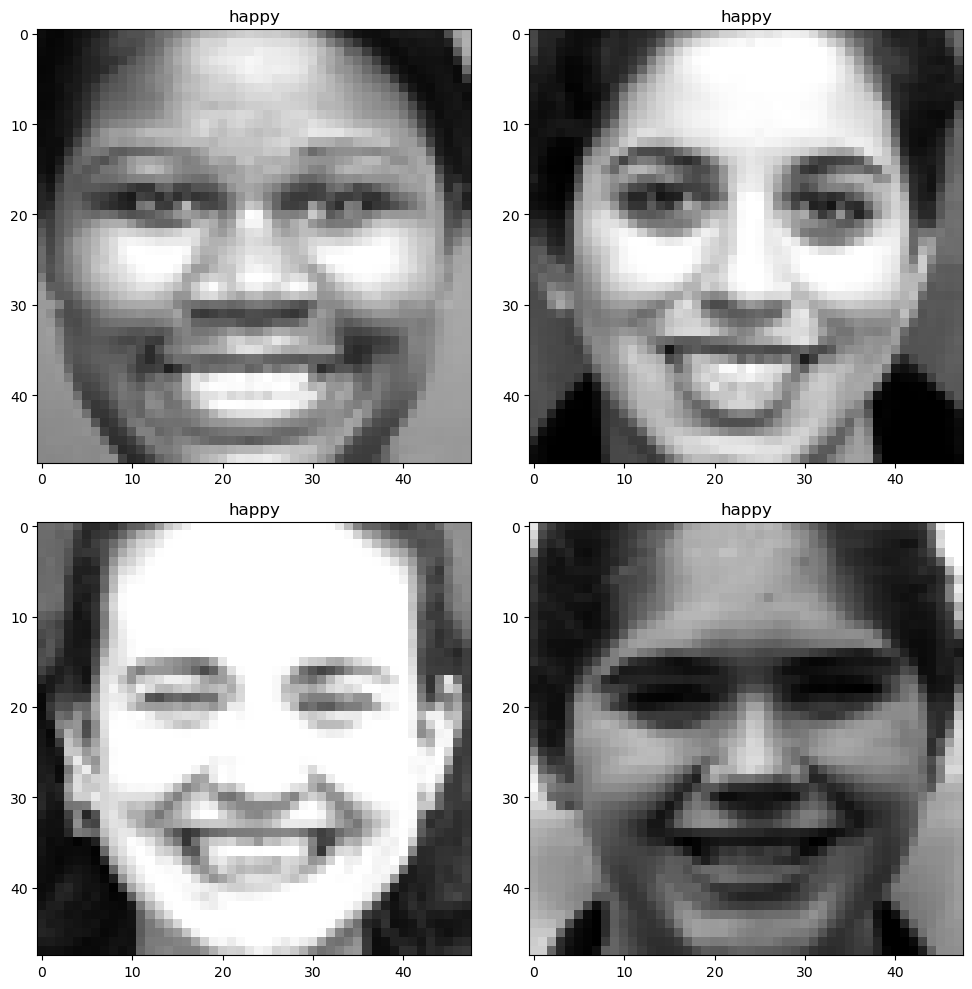

In [12]:
fig = plt.figure(figsize=(10,10))

for i in range(4): 
    fig.add_subplot(2, 2, i + 1) 
    plt.imshow(np.array(cv2.imread(image_paths[i])), cmap='gray')
    plt.title(image_paths[i].split(os.path.sep)[-2]) 

plt.tight_layout() 
plt.show()


### FEATURE EXTRACTION 
The visualization above is already gray-scaled, but the function below converts it using OpenCV to extract features. im is the image path.

In [8]:
def grayscale(im):
    image = cv2.imread(im)
    im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return im_gray

Function for resizing images

In [9]:
def resize(image, size):
    return cv2.resize(image, (size,size))

Using HOG to extract features. There are no Python packages that I am aware of that does this. So below is the code for the predefined function that the author use. The function that does the job is hog(). The hog() function divides it into 7 bins, patches of 8x8 pixels and gourp the patches into 4x4 blocks. The function then normalizes these blocks. These will be our "features", or in the more traditional IBEB teachings, predictors. The lables will be our outcome variables.

In [10]:
def feat_lab(image_paths):
    features = []
    labels = []

    for image_paths in image_paths:
        im = grayscale(image_paths)
        im = resize(im,64)
        fd1 =  hog(im, orientations=7, pixels_per_cell=(8, 8),cells_per_block=(4, 4),block_norm= 'L2-Hys' ,transform_sqrt = False)
        features.append(fd1)

        label = image_paths.split(os.path.sep)[-2]
        labels.append(label)
        

    features = np.array(features)
    labels = np.array(labels)
    return features,labels

features,labels = feat_lab(image_paths)

print("#Features" + str(features.shape[1]))

print("#Samples" + str(labels.shape[0]))

#Features2800
#Samples981


Visualizing the HOG after feature extractions

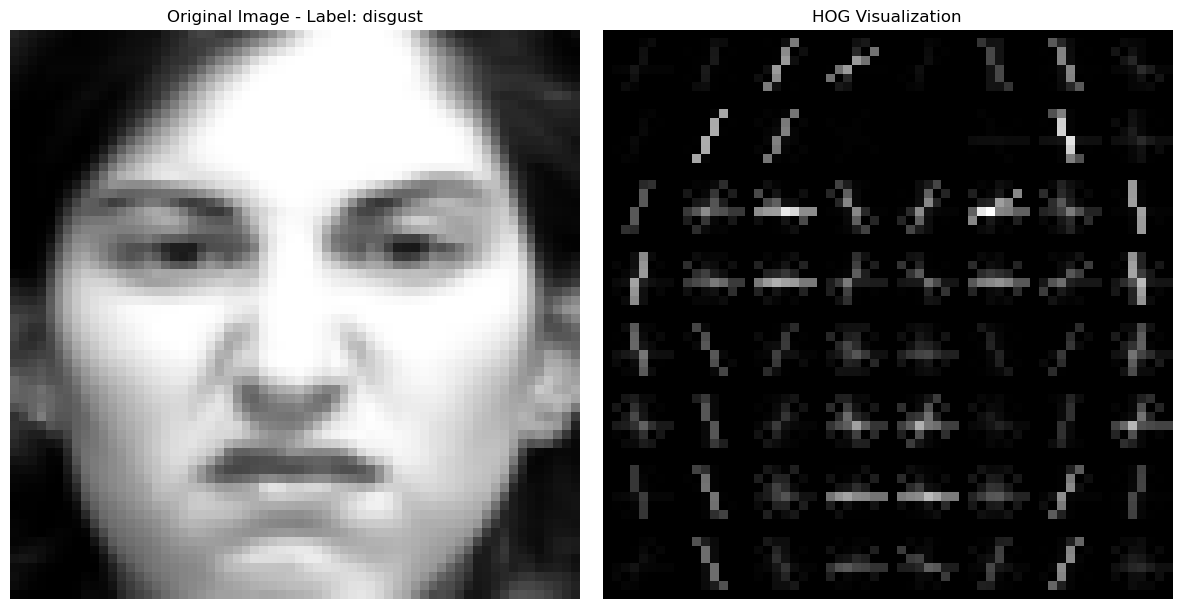

In [16]:
def visualize_hog(image_path):
    # Use the specified image path
    specific_image_path = image_path  # Exact path to the image
    
    # Extract label and process the image
    label = specific_image_path.split(os.path.sep)[-2]
    
    # Process the image (reusing feat_lab logic)
    im = grayscale(specific_image_path)
    im_resized = resize(im, 64)

    # Compute HOG features and visualization
    fd, hog_image = hog(
        im_resized,
        orientations=7,
        pixels_per_cell=(8, 8),
        cells_per_block=(4, 4),
        block_norm='L2-Hys',
        transform_sqrt=False,
        visualize=True,  # Enable visualization
        feature_vector=True,
    )

    # Plot the original and HOG visualization side-by-side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(im_resized, cmap='gray')
    plt.title(f"Original Image - Label: {label}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Visualization")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example Usage
image_path = "ckplus/CK+48/disgust/S077_006_00000014.png"  # Specific image path
visualize_hog(image_path)

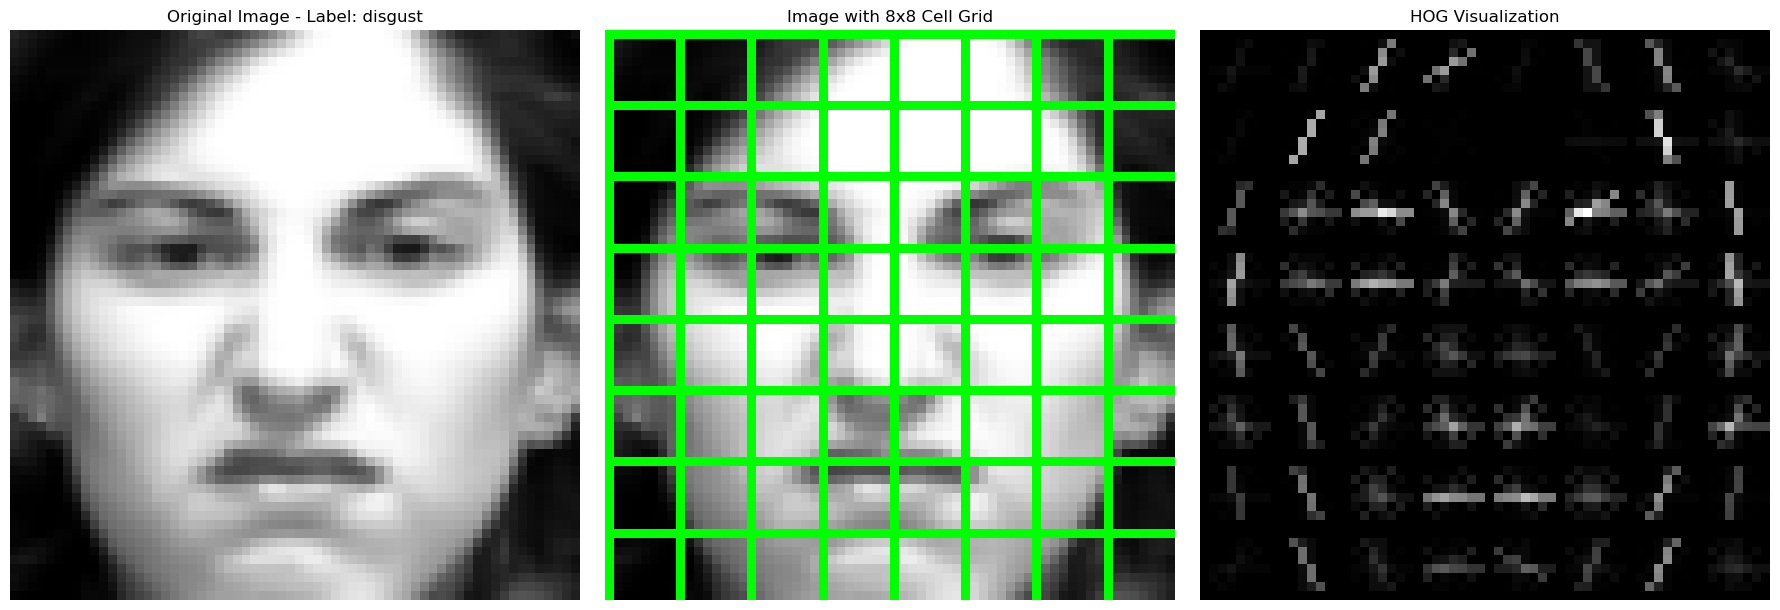

In [17]:
def visualize_hog(image_path):
    # Use the specified image path
    specific_image_path = image_path  # Exact path to the image
    
    # Extract label and process the image
    label = specific_image_path.split(os.path.sep)[-2]
    
    # Process the image (reusing feat_lab logic)
    im = grayscale(specific_image_path)
    im_resized = resize(im, 64)

    # Compute HOG features and visualization
    fd, hog_image = hog(
        im_resized,
        orientations=7,
        pixels_per_cell=(8, 8),
        cells_per_block=(4, 4),
        block_norm='L2-Hys',
        transform_sqrt=False,
        visualize=True,  # Enable visualization
        feature_vector=True,
    )

    # Prepare grid visualization
    cell_size = 8  # 8x8 cells
    grid_image = cv2.cvtColor(im_resized, cv2.COLOR_GRAY2BGR)  # Convert to color for grid lines
    rows, cols = grid_image.shape[:2]
    for r in range(0, rows, cell_size):
        cv2.line(grid_image, (0, r), (cols, r), (0, 255, 0), 1)  # Horizontal grid lines
    for c in range(0, cols, cell_size):
        cv2.line(grid_image, (c, 0), (c, rows), (0, 255, 0), 1)  # Vertical grid lines

    # Plot the visualizations
    plt.figure(figsize=(18, 6))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(im_resized, cmap='gray')
    plt.title(f"Original Image - Label: {label}")
    plt.axis("off")

    # Image with Grid
    plt.subplot(1, 3, 2)
    plt.imshow(grid_image)
    plt.title("Image with 8x8 Cell Grid")
    plt.axis("off")

    # HOG Visualization
    plt.subplot(1, 3, 3)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Visualization")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example Usage
image_path = "ckplus/CK+48/disgust/S077_006_00000014.png"  # Specific image path
visualize_hog(image_path)

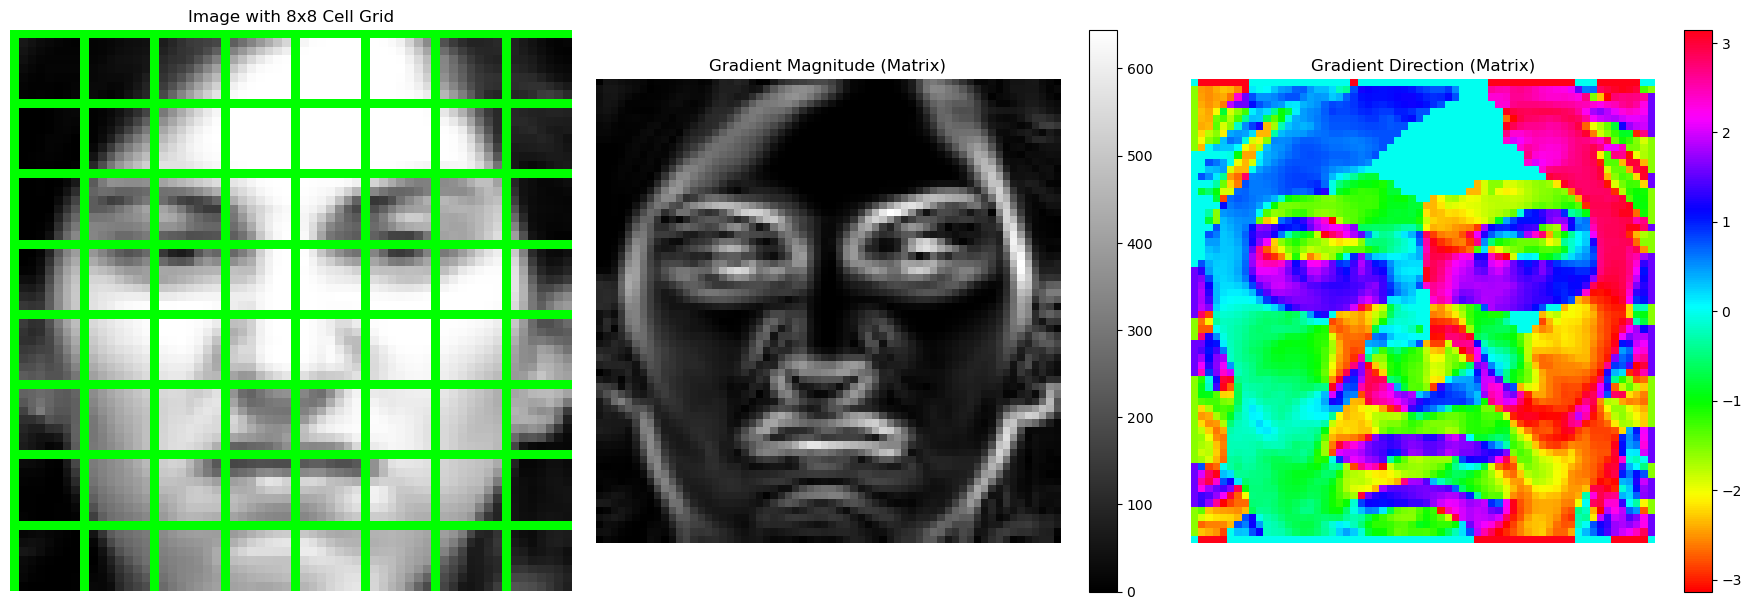

In [18]:
def visualize_hog_gradients(image_path):
    specific_image_path = image_path  
    label = specific_image_path.split(os.path.sep)[-2]
    im = grayscale(specific_image_path)
    im_resized = resize(im, 64)
    grad_x = cv2.Sobel(im_resized, cv2.CV_64F, 1, 0, ksize=3)  
    grad_y = cv2.Sobel(im_resized, cv2.CV_64F, 0, 1, ksize=3)  
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)  
    gradient_direction = np.arctan2(grad_y, grad_x)  

    
    cell_size = 8  
    grid_image = cv2.cvtColor(im_resized, cv2.COLOR_GRAY2BGR)  
    rows, cols = grid_image.shape[:2]
    for r in range(0, rows, cell_size):
        cv2.line(grid_image, (0, r), (cols, r), (0, 255, 0), 1)  
    for c in range(0, cols, cell_size):
        cv2.line(grid_image, (c, 0), (c, rows), (0, 255, 0), 1)      
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(grid_image)
    plt.title("Image with 8x8 Cell Grid")
    plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.colorbar()
    plt.title("Gradient Magnitude (Matrix)")
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(gradient_direction, cmap='hsv')
    plt.colorbar()
    plt.title("Gradient Direction (Matrix)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


image_path = "ckplus/CK+48/disgust/S077_006_00000014.png" 
visualize_hog_gradients(image_path)

### NAIVE BAYES

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
naive = GaussianNB()
naive_res = naive.fit(X_train,y_train)

In [81]:
pred_naive = naive_res.predict(X_test)

In [82]:
print(classification_report(y_test, pred_naive))

              precision    recall  f1-score   support

       anger       0.73      0.80      0.76        40
    contempt       0.73      0.65      0.69        17
     disgust       1.00      0.84      0.91        55
        fear       0.63      0.81      0.71        21
       happy       0.94      0.97      0.95        60
     sadness       0.83      0.80      0.82        25
    surprise       0.95      0.95      0.95        77

    accuracy                           0.87       295
   macro avg       0.83      0.83      0.83       295
weighted avg       0.88      0.87      0.87       295



In [84]:
accuracy_score(y_test,pred_naive)

0.8711864406779661

### KNN


Split into train and test using the features and the labels that we have just created using the previous function

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.3,random_state=3011)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

How the sklearn package works is a little bit different to how R works. Here I have to initialize the knn using a classifier function, use it to do grid search, then fit the model.

In [ ]:
knn = KNeighborsClassifier()
kfold=KFold(n_splits=10,shuffle=True,random_state=3011)
params={'n_neighbors': np.arange(1, 50, 1)}
knn_cv=GridSearchCV(knn, param_grid=params, cv=kfold, verbose=1)
knn_res = knn_cv.fit(X_train, y_train)


Saving this for later reference

In [77]:
with open('knn_cv_results.pkl', 'wb') as f:
    pickle.dump(knn_res, f)

In [74]:
knn_res.best_params_

{'n_neighbors': 1}

In [59]:
pred_knn = knn_res.predict(X_test)

In [60]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

       anger       0.85      0.85      0.85        40
    contempt       0.82      0.82      0.82        17
     disgust       1.00      0.98      0.99        55
        fear       1.00      0.86      0.92        21
       happy       1.00      1.00      1.00        60
     sadness       0.96      0.88      0.92        25
    surprise       0.93      1.00      0.96        77

    accuracy                           0.95       295
   macro avg       0.94      0.91      0.92       295
weighted avg       0.95      0.95      0.95       295



In [61]:
print(accuracy_score(y_test, pred_knn))

0.9457627118644067


### SVM
The code below init the SVC. Note: The grid search on SVC originally has the $d$ parameter, but it was removed due to the grid search not choosing the 'poly' kernel and including it would increase computational load.

In [65]:
svm = SVC()
params_svm={
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear','poly', 'rbf', 'sigmoid']}
svm_cv=GridSearchCV(svm, param_grid=params_svm, cv=kfold, verbose=1)
svm_res = svm_cv.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [75]:
svm_res.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

Fit SVC

In [ ]:
svm_res.fit(X_train, y_train)

In [78]:
with open('svm_cv_results.pkl', 'wb') as f:
    pickle.dump(svm_res, f)

Predict using SVC

In [68]:
pred_svm = svm_res.predict(X_test)

In [69]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

       anger       0.84      0.93      0.88        40
    contempt       1.00      0.94      0.97        17
     disgust       1.00      1.00      1.00        55
        fear       1.00      0.86      0.92        21
       happy       1.00      1.00      1.00        60
     sadness       0.88      0.88      0.88        25
    surprise       1.00      1.00      1.00        77

    accuracy                           0.97       295
   macro avg       0.96      0.94      0.95       295
weighted avg       0.97      0.97      0.97       295



In [70]:
print(accuracy_score(y_test, pred_svm))

0.9661016949152542
